# Ozone Level - Mt. Rainer
##### Rie Durnel and Kevin Olbright 
##### CPSC 322, Spring 2022

## Introduction 
For this project we chose the EPA's ozone and weather measurements for Mt. Rainer beginning in 2007.   
We were attempting to predict ozone levels based on the weather conditions at the time of measurement.  
The classifier that worked the best was the kNNeighbors classifier with the highest percentage recognition for each class label. 

## Data Analysis
Our dataset consisted almost entirely of continuous data. Even the non-continuous data was designed to be entirely unique. This meant that we were required to discritize our data in order to ensure that the desicion trees and other classifiers could be constructed or remove unique idenifiers before classifying the data.  
Initially, before cleaning, the dataset had 78888 instances. After removing rows with most of the column data missing, we were left with 36699 rows of data. This was too much for our machines to compute so we pruned the data until we were left with 1050 instances with each ozone level being represented an equal number of times. 

In [3]:
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myrandomforestclassifier 
importlib.reload(mysklearn.myrandomforestclassifier)
from mysklearn.myrandomforestclassifier import MyRandomForestClassifier

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyDecisionTreeClassifier, \
                MyNaiveBayesClassifier, MyKNeighborsClassifier

from mysklearn import myvisualization 
importlib.reload(myvisualization)

from mysklearn import myevaluation
importlib.reload(myevaluation)

continuous_data = MyPyTable()
continuous_data.load_from_file("meteorological-hourly-clean.csv")
discretized_data = MyPyTable()
discretized_data.load_from_file("meteorological-dataset.csv")
print()

#### Temperature

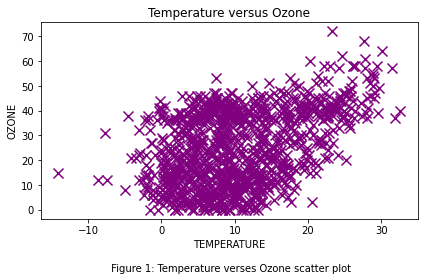

In [8]:
x_label = "TEMPERATURE"
y_label = "OZONE"
x_data = continuous_data.get_column(x_label)
y_data = continuous_data.get_column(y_label)
x_label = x_label + "\n \n Figure 1: Temperature verses Ozone scatter plot"
title = "Temperature versus Ozone"
myvisualization.scatter_chart_creation(x_data, y_data, x_label=x_label, y_label=y_label, title=title)


Figure 1 shows a slight positive dependence between the two columns.  
Post discretization, the distribution of the Temperature values is shown in figure 2.   

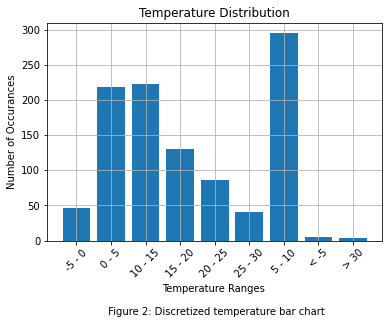

In [9]:
att_name = "Temperature"
att_vals = discretized_data.get_column(att_name)
unique_vals = myutils.find_unique_items(att_vals)
num_vals = myutils.count_unique_items(att_vals, unique_vals)
title = "Temperature Distribution"
x_label = "Temperature Ranges \n \n Figure 2: Discretized temperature bar chart"
y_label = "Number of Occurances"
myutils.bar_chart(unique_vals, num_vals, title=title, xlabel=x_label, ylabel=y_label, rotation=45)


#### Relative Humidity 

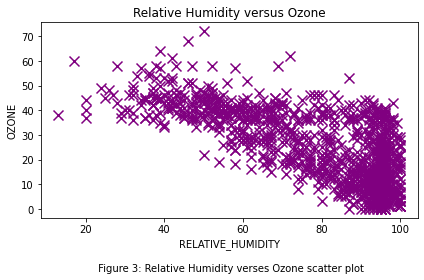

In [10]:
x_label = "RELATIVE_HUMIDITY"
y_label = "OZONE"
x_data = continuous_data.get_column(x_label)
y_data = continuous_data.get_column(y_label)
title = "Relative Humidity versus Ozone"
x_label = x_label + "\n \n Figure 3: Relative Humidity verses Ozone scatter plot"
myvisualization.scatter_chart_creation(x_data, y_data, x_label=x_label, y_label=y_label, title=title)


The graph of the Relative Humidity versus the Ozone shows an inverse dependence between the two columns.  
After we discretized the data the distribution looks as follows:

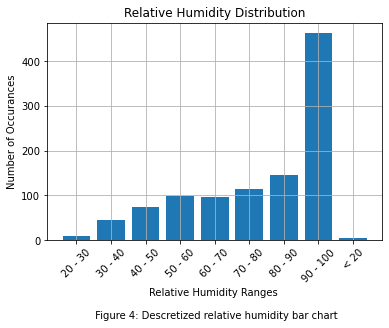

In [11]:
att_name = "Relative Humidity"
att_vals = discretized_data.get_column(att_name)
unique_vals = myutils.find_unique_items(att_vals)
num_vals = myutils.count_unique_items(att_vals, unique_vals)
title = "Relative Humidity Distribution"
x_label = "Relative Humidity Ranges \n \n Figure 4: Descretized relative humidity bar chart"
y_label = "Number of Occurances"
myutils.bar_chart(unique_vals, num_vals, title=title, xlabel=x_label, ylabel=y_label, rotation=45)

#### Solar Radiation

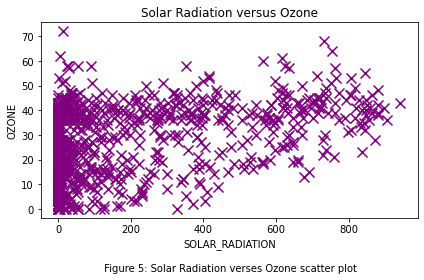

In [12]:
x_label = "SOLAR_RADIATION"
y_label = "OZONE"
x_data = continuous_data.get_column(x_label)
y_data = continuous_data.get_column(y_label)
title = "Solar Radiation versus Ozone"
x_label = x_label + "\n \n Figure 5: Solar Radiation verses Ozone scatter plot"
myvisualization.scatter_chart_creation(x_data, y_data, x_label=x_label, y_label=y_label, title=title)


The graph of the Solar Radiation versus Ozone shows the slightest indication of a positive dependence between the attributes.  
The following graph is the distribute of our discretized data.  

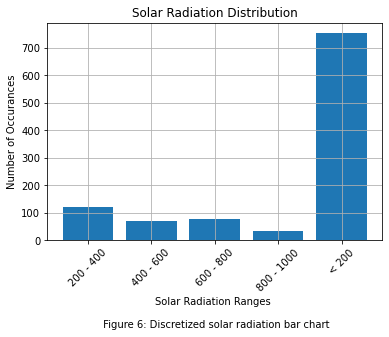

In [13]:
att_name = "Solar Radiation"
att_vals = discretized_data.get_column(att_name)
unique_vals = myutils.find_unique_items(att_vals)
num_vals = myutils.count_unique_items(att_vals, unique_vals)
title = "Solar Radiation Distribution"
x_label = "Solar Radiation Ranges \n \n Figure 6: Discretized solar radiation bar chart"
y_label = "Number of Occurances"
myutils.bar_chart(unique_vals, num_vals, title=title, xlabel=x_label, ylabel=y_label, rotation=45)

#### Precipitation

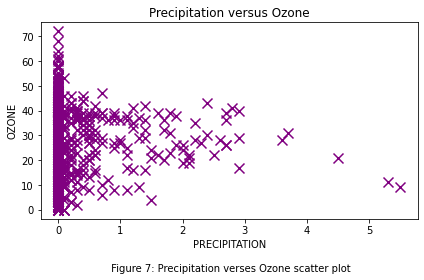

In [14]:
x_label = "PRECIPITATION"
y_label = "OZONE"
x_data = continuous_data.get_column(x_label)
y_data = continuous_data.get_column(y_label)
title = "Precipitation versus Ozone"
x_label = x_label + "\n \n Figure 7: Precipitation verses Ozone scatter plot"
myvisualization.scatter_chart_creation(x_data, y_data, x_label=x_label, y_label=y_label, title=title)


Most of the values for the Precipitation column are in the same range which is shown in the above Precipitaion versus Ozone graph and the below distribution. 

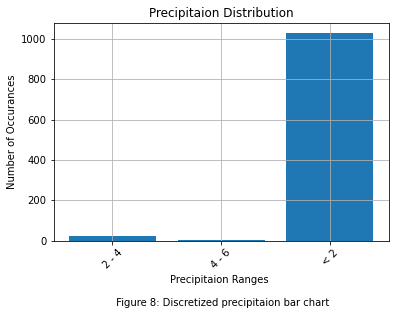

In [15]:
att_name = "Precipitaion"
att_vals = discretized_data.get_column(att_name)
unique_vals = myutils.find_unique_items(att_vals)
num_vals = myutils.count_unique_items(att_vals, unique_vals)
title = "Precipitaion Distribution"
x_label = "Precipitaion Ranges \n \n Figure 8: Discretized precipitaion bar chart"
y_label = "Number of Occurances"
myutils.bar_chart(unique_vals, num_vals, title=title, xlabel=x_label, ylabel=y_label, rotation=45)

#### Wind Speed 

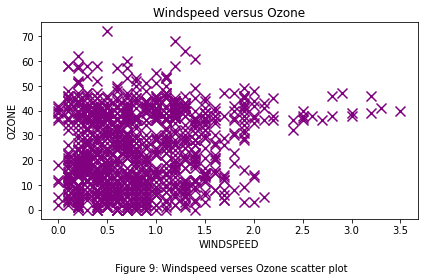

In [16]:
x_label = "WINDSPEED"
y_label = "OZONE"
x_data = continuous_data.get_column(x_label)
y_data = continuous_data.get_column(y_label)
title = "Windspeed versus Ozone"
x_label = x_label + "\n \n Figure 9: Windspeed verses Ozone scatter plot"
myvisualization.scatter_chart_creation(x_data, y_data, x_label=x_label, y_label=y_label, title=title)


Once again, due to the clumped nature of the values, the Windspeed versus Ozone graph does not seem to show any dependences. This can be seen in the below bar graph of the Windspeed groups.

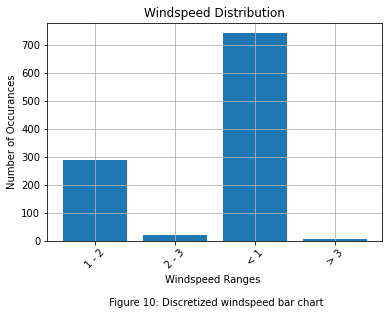

In [17]:
att_name = "Windspeed"
att_vals = discretized_data.get_column(att_name)
unique_vals = myutils.find_unique_items(att_vals)
num_vals = myutils.count_unique_items(att_vals, unique_vals)
title = "Windspeed Distribution"
x_label = "Windspeed Ranges \n \n Figure 10: Discretized windspeed bar chart"
y_label = "Number of Occurances"
myutils.bar_chart(unique_vals, num_vals, title=title, xlabel=x_label, ylabel=y_label, rotation=45)

#### Wind Direction

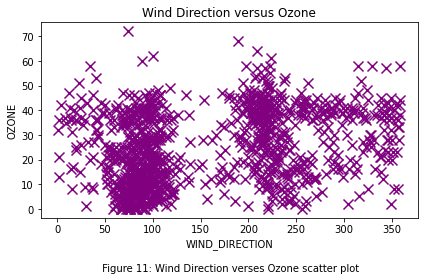

In [18]:
x_label = "WIND_DIRECTION"
y_label = "OZONE"
x_data = continuous_data.get_column(x_label)
y_data = continuous_data.get_column(y_label)
title = "Wind Direction versus Ozone"
x_label = x_label + "\n \n Figure 11: Wind Direction verses Ozone scatter plot"
myvisualization.scatter_chart_creation(x_data, y_data, x_label=x_label, y_label=y_label, title=title)


This colum shows the direction that the wind is approaching with 0 being North and moving clockwise around the points of the compass. While there doesn't seem to be a dependence between the two columns but we can see the most common wind directions to be around East and South-West. 

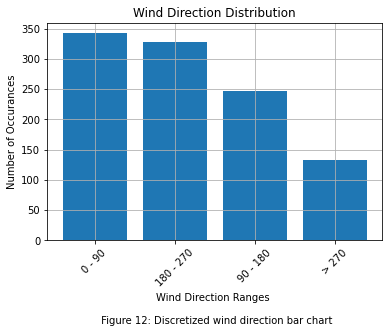

In [20]:
att_name = "Wind Direction"
att_vals = discretized_data.get_column(att_name)
unique_vals = myutils.find_unique_items(att_vals)
num_vals = myutils.count_unique_items(att_vals, unique_vals)
title = "Wind Direction Distribution"
x_label = "Wind Direction Ranges \n \n Figure 12: Discretized wind direction bar chart"
y_label = "Number of Occurances"
myutils.bar_chart(unique_vals, num_vals, title=title, xlabel=x_label, ylabel=y_label, rotation=45)

#### Shelter Temperature 

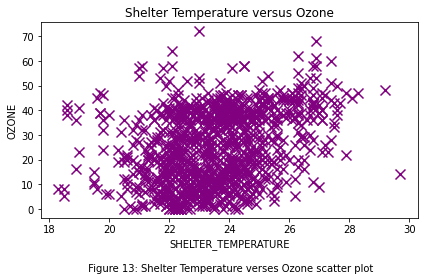

In [21]:
x_label = "SHELTER_TEMPERATURE"
y_label = "OZONE"
x_data = continuous_data.get_column(x_label)
y_data = continuous_data.get_column(y_label)
title = "Shelter Temperature versus Ozone"
x_label = x_label + "\n \n Figure 13: Shelter Temperature verses Ozone scatter plot"
myvisualization.scatter_chart_creation(x_data, y_data, x_label=x_label, y_label=y_label, title=title)


The Shelter temperature is the temperature in the shelter where the measurement was taken. There does not seem to be a relationship between the temperature in the shelter and the Ozone level but if you squint there might be an argument for a positive one. The dicretized version of the data indicates that most of the values reside in the same ranges. 

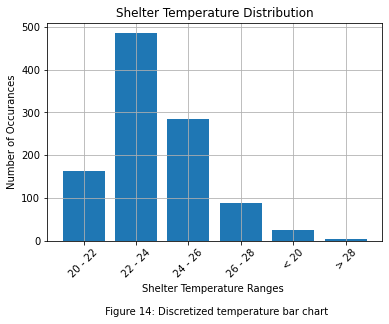

In [22]:
att_name = "Shelter Temperature"
att_vals = discretized_data.get_column(att_name)
unique_vals = myutils.find_unique_items(att_vals)
num_vals = myutils.count_unique_items(att_vals, unique_vals)
title = "Shelter Temperature Distribution"
x_label = "Shelter Temperature Ranges \n \n Figure 14: Discretized temperature bar chart"
y_label = "Number of Occurances"
myutils.bar_chart(unique_vals, num_vals, title=title, xlabel=x_label, ylabel=y_label, rotation=45)

#### Ozone

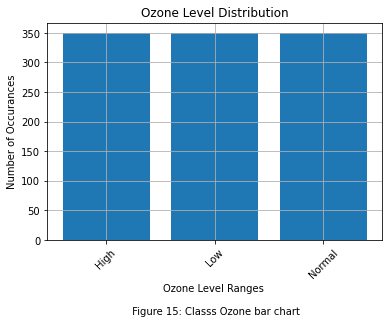

In [24]:
att_name = "Ozone Level"
att_vals = discretized_data.get_column(att_name)
unique_vals = myutils.find_unique_items(att_vals)
num_vals = myutils.count_unique_items(att_vals, unique_vals)
title = "Ozone Level Distribution"
x_label = "Ozone Level Ranges \n \n Figure 15: Classs Ozone bar chart"
y_label = "Number of Occurances"
myutils.bar_chart(unique_vals, num_vals, title=title, xlabel=x_label, ylabel=y_label, rotation=45)

Due to the large size of our data we cut the values down until there were an equal number of each class value and a total number of 1050 instaces. This was so we could easily see how the classifiers handled each type of class result. Because we have three classes of equal distribution, our basis accuracy is 33.33%, which we aimed to beat with classification.

## Classification

We used four different classifiers to classify the data and compared them to determine the best classifier for our data.  

We used two different datasets for the classification. For the Random Forest, Decision Tree, and Naive-Bayes classifiers we used a discretized dataset, while for the kNN classifier we used the original continuous dataset.  
We made the decision to do this because the kNN has the unique ability to handle contiuous data so in order to have each classifier perform the best it could, we used the differing datasets.  
That being said, the datsets were parallel so we used the same instances for the train and test sets to ensure the most accurate comparison.

For the comparision, we looked at the recongnition of each class value. We wanted the largest values possible for each class for the same classifier. This indicates whether the classifier can handle each class type. 

In [90]:
contiuous_names = ["TEMPERATURE","RELATIVE_HUMIDITY","SOLAR_RADIATION","PRECIPITATION","WINDSPEED","WIND_DIRECTION","FLOW_RATE","WINDSPEED_SCALAR","SHELTER_TEMPERATURE","OZONE"]
contiuous_att_data = continuous_data.get_multiple_columns(contiuous_names, "", False)
contiuous_class_data  = continuous_data.get_column("OZONE_LEVEL")

train_folds, test_folds = myevaluation.stratified_kfold_cross_validation(contiuous_att_data.data, contiuous_class_data, n_splits=10, random_state=None, shuffle=True)

contiuous_att_train_data = myutils.create_empty_list(len(train_folds))
contiuous_att_test_data = myutils.create_empty_list(len(train_folds))
contiuous_class_train_data = myutils.create_empty_list(len(train_folds))
contiuous_class_test_data = myutils.create_empty_list(len(train_folds))

for i,_ in enumerate(train_folds):
    contiuous_att_train_data[i] = myutils.indexes_to_values(train_folds[i], contiuous_att_data.data)
    contiuous_att_test_data[i] = myutils.indexes_to_values(test_folds[i], contiuous_att_data.data)
    contiuous_class_train_data[i] = myutils.indexes_to_values(train_folds[i], contiuous_class_data)
    contiuous_class_test_data[i] = myutils.indexes_to_values(test_folds[i], contiuous_class_data)

contiuous_class_labels = myutils.find_unique_items(contiuous_class_data)


In [91]:
discretized_names = ["Month","Temperature","Relative Humidity","Solar Radiation","Precipitaion","Windspeed","Wind Direction","Shelter Temperature"]
discretized_att_data = discretized_data.get_multiple_columns(discretized_names, "", False)
discretized_class_data = discretized_data.get_column("Ozone Level")

discretized_att_train_data = myutils.create_empty_list(len(train_folds))
discretized_att_test_data = myutils.create_empty_list(len(train_folds))
discretized_class_train_data = myutils.create_empty_list(len(train_folds))
discretized_class_test_data = myutils.create_empty_list(len(train_folds))

for i,_ in enumerate(train_folds):
    discretized_att_train_data[i] = myutils.indexes_to_values(train_folds[i], discretized_att_data.data)
    discretized_att_test_data[i] = myutils.indexes_to_values(test_folds[i], discretized_att_data.data)
    discretized_class_train_data[i] = myutils.indexes_to_values(train_folds[i], discretized_class_data)
    discretized_class_test_data[i] = myutils.indexes_to_values(test_folds[i], discretized_class_data)

discretized_class_labels = myutils.find_unique_items(discretized_class_data)


#### Random Forest Classifier

In [92]:
classifier = MyRandomForestClassifier(n_val=100, m_val=10, f_val=2)
rf_y_pred, rf_y_true = myutils.perform_classification_on_folds(classifier, discretized_att_train_data, discretized_class_train_data, discretized_att_test_data, discretized_class_test_data)
print("Random Forest Classifier Analysis: ")
%time myutils.perform_analysis_on_classification(rf_y_true, rf_y_pred, discretized_class_labels, ["Ozone Group"])
print()

Random Forest Classifier Analysis: 
Accuracy:  0.6209523809523809
Error Rate:  0.379047619047619
Precision:  0.7128463476070529
Recall:  0.8085714285714286
F1 measure:  0.7576974564926373
Confusion Matrix
-------------------------------
Ozone Group      High    Low    Normal    Total    Recongnition (%)
-------------  ------  -----  --------  -------  ------------------
High              283     24        43      350             80.8571
Low                10    259        81      350             74
Normal            104    136       110      350             31.4286
CPU times: user 9.74 ms, sys: 10 ms, total: 19.8 ms
Wall time: 14.7 ms



Overview:  
The random forest classifier takes in training data both x and y data. It then used the bootstrap method to divide the data into training and varification data. The classifier is then run on the training data to create the tree. The trees vary from normal decision trees because the number of attributes avalible for spliting is limited to a maximum of the F value. The tree is then validated using the remaining data. The accuracy is then checked for the tree and both the tree and the resulting accuracy are stored. This process of bootstrapping the data and validating it is repeated until N number of trees are created. Afterwards the M number of trees with the highest accuracy are stored as the final forest for future predictions.  
When a true prediction is required, the testing values are passed into the forest predict method. The predict is then called for each indivivual tree and the results are stored. The final prediction is the majority vote of the individual trees. 

Result:  
The random forest classifier takes the longest amount of time to run. For each stratified fold, the classifier must make N number of trees and test each one. For predict it is nearly the same due to the fact that the classifier much perform prediction M number of times and then find the most common prediction for each unknown value. On our machines and in the docker container, the random forest classifier takes way too much time to be much use on larger datasets.  
For recongnition we were getting very high values for the high and low classes but low for the normal class. This lowers the effectiveness of the classifier. 

#### Decision Tree Classifier

In [93]:
dt_y_pred, dt_y_true = myutils.perform_classification_on_folds(MyDecisionTreeClassifier(), discretized_att_train_data, discretized_class_train_data, discretized_att_test_data, discretized_class_test_data)
print("Decision Tree Classifier Analysis: ")
%time myutils.perform_analysis_on_classification(dt_y_true, dt_y_pred, discretized_class_labels, ["Ozone Group"])
print()

Decision Tree Classifier Analysis: 
Accuracy:  0.6352380952380953
Error Rate:  0.3647619047619048
Precision:  0.7111650485436893
Recall:  0.8371428571428572
F1 measure:  0.7690288713910762
Confusion Matrix
-------------------------------
Ozone Group      High    Low    Normal    Total    Recongnition (%)
-------------  ------  -----  --------  -------  ------------------
High              293     20        37      350             83.7143
Low                12    258        80      350             73.7143
Normal            107    127       116      350             33.1429
CPU times: user 2.8 ms, sys: 10 ms, total: 12.8 ms
Wall time: 10 ms



Overview:  
The decision tree takes in attribute data and class data and created a decision tree based on entropy. This is stored until the predict is called which results in the tree being recursively transversed until a leaf node is reached and the found class is returned. 

Result:  
The decision tree classifier is significatly faster than the random forest but results is about the same recongnition as the random forest distribution which raises questions regarding the usefulness of the random forest classifier.

#### kNN Classifier

In [94]:
knn_y_pred, knn_y_true = myutils.perform_classification_on_folds(MyKNeighborsClassifier(), contiuous_att_train_data, contiuous_class_train_data, contiuous_att_test_data, contiuous_class_test_data)
print("kNN Classifier Analysis: ")
%time myutils.perform_analysis_on_classification(knn_y_true, knn_y_pred, discretized_class_labels, ["Ozone Group"])
print()


kNN Classifier Analysis: 
Accuracy:  0.7895238095238095
Error Rate:  0.21047619047619048
Precision:  0.829971181556196
Recall:  0.8228571428571428
F1 measure:  0.8263988522238163
Confusion Matrix
-------------------------------
Ozone Group      High    Low    Normal    Total    Recongnition (%)
-------------  ------  -----  --------  -------  ------------------
High              288      2        60      350             82.2857
Low                 3    298        49      350             85.1429
Normal             56     51       243      350             69.4286
CPU times: user 13.7 ms, sys: 11 µs, total: 13.7 ms
Wall time: 10.3 ms



Overview:  
The kNN classifier takes in a list of x and y training data and stores it. When the predict is called, the classifier calculates the distance between the test instance and each train instance. The closest neighbors are seperated and the classes of those train instances are voted on and the resulting class is the predicted value for the test instance. 

Result:  
The kNN classifier takes some time to run since the number of calculations it needs to do goes up significatly as more data is added. That being said, for the amount of data we had, it ran reasonably fast as compared to the random forest classifier.  
What really sets it apart is the recognition of all the classes. The recognition for the high and low class are about the same as the tree and forest classifiers, but the recognition for the normal class label is about double that of the tree based classifiers. This is most likely due to the contiuous aspect of the data. When the discretization of the data is done, we lose a lot of information and thus a lot of the predictive power. 

#### Naive Bayes Classifier

In [95]:
nb_y_pred, nb_y_true = myutils.perform_classification_on_folds(MyNaiveBayesClassifier(), discretized_att_train_data, discretized_class_train_data, discretized_att_test_data, discretized_class_test_data)
print("Naive-Bayes Classifier Analysis: ")
%time myutils.perform_analysis_on_classification(nb_y_true, nb_y_pred, discretized_class_labels, ["Ozone Group"])
print()


Naive-Bayes Classifier Analysis: 
Accuracy:  0.3333333333333333
Error Rate:  0.6666666666666666
Precision:  0.3339712918660287
Recall:  0.9971428571428571
F1 measure:  0.5003584229390681
Confusion Matrix
-------------------------------
Ozone Group      High    Low    Normal    Total    Recongnition (%)
-------------  ------  -----  --------  -------  ------------------
High              349      0         1      350           99.7143
Low               347      0         3      350            0
Normal            349      0         1      350            0.285714
CPU times: user 14.3 ms, sys: 13 µs, total: 14.3 ms
Wall time: 10.7 ms



Overview:  
The Naive-Bayes classifier calculates the probability of each attribute value in a column. When predicting, the attribute values in the test instance is matched to the previously calculated probability. The probabilities are then multiplied together to get the probability of each class result. The largest probability is then the predicted class. 

Result:  
The Naive_Bayes classifier recognizes the high class nearly 100% of the time. The other class recognition is almost zero as a result. This makes the Naive-Bayes classifier the worst choice for classifying our dataset. The accuracy matches exactly our base accuracy with the way the data is distributed, which makes this classifier entirely uninformative for our dataset.

## Conclusion

For this project we attempted to delve into the mystical art of predicting the weather. We attempted to predict the ozone levels based on other weather attributes. In doing so we hoped to be able to apply this as an aid to weather predictions to also predict ozone at the same time. The data set we used consisted of enviromental measurements along with ozone measurements. The issue with this type of dataset is that it was completely continuous outside of unique identifiers. This meant that we needed to discretize our data before using three of our four classifiers and is also meant that we lost a lot of important distinctions in our data to the buckets of groups. 

We found that the best classifier we developed was the kNN classifier. This due to the fact that the classifier was able to make use of the continuous data instead of the discretized data. The kNN classifier had the highest recognition across all the classes when compared to the other three classifiers. 

If we had more time and better reasources to increase the performance, we would try the following things:  
1. Use more instances to get a better classifier 
    * Not viable due to the time requirements for running the code on our computers in the docker container
1. Fine tune the discretiztion
    * We eyeballed the groups based on the unique items in the dataset. If we had more data we would be able to make the groups smaller which would allow for more noticable differences
1. Create a random forest using kNN
    * This would require much better hardware to pull off as the time and RAM requirements make it hopeless on our personal computers